<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_0_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.425660,78.710529,0.311816,128.448005,128.125563,0.322442
1,0.0,1.0,64.916780,58.114124,0.035933,133.066838,133.029405,0.037434
2,0.0,2.0,52.004747,91.363001,-0.059087,153.308662,153.368088,-0.059427
3,0.0,3.0,68.043000,35.408366,-0.253246,113.198120,113.445270,-0.247150
4,0.0,4.0,30.692258,30.082739,-0.307713,70.467284,70.745473,-0.278189
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.119781,73.174639,-0.285099,118.009321,118.318915,-0.309594
249996,999.0,246.0,47.746434,54.220218,0.263233,112.229885,111.951070,0.278815
249997,999.0,247.0,62.500163,47.949371,0.141265,120.590800,120.410917,0.179882
249998,999.0,248.0,81.006086,25.497635,-0.474583,116.029138,116.414351,-0.385213


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    39.425660  78.710529  0.311816  128.448005  128.125563  0.322442
      1.0    64.916780  58.114124  0.035933  133.066838  133.029405  0.037434
      2.0    52.004747  91.363001 -0.059087  153.308662  153.368088 -0.059427
      3.0    68.043000  35.408366 -0.253246  113.198120  113.445270 -0.247150
      4.0    30.692258  30.082739 -0.307713   70.467284   70.745473 -0.278189
...                ...        ...       ...         ...         ...       ...
999.0 245.0  35.119781  73.174639 -0.285099  118.009321  118.318915 -0.309594
      246.0  47.746434  54.220218  0.263233  112.229885  111.951070  0.278815
      247.0  62.500163  47.949371  0.141265  120.590800  120.410917  0.179882
      248.0  81.006086  25.497635 -0.474583  116.029138  116.414351 -0.385213
      249.0  33.125100  36.473889 -0.103621   79.495369   79.570325 -0.074956

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    39.425660  78.710529  0.311816  128.448005  128.125563  0.322442
      1.0    64.916780  58.114124  0.035933  133.066838  133.029405  0.037434
      2.0    52.004747  91.363001 -0.059087  153.308662  153.368088 -0.059427
      3.0    68.043000  35.408366 -0.253246  113.198120  113.445270 -0.247150
      4.0    30.692258  30.082739 -0.307713   70.467284   70.745473 -0.278189
...                ...        ...       ...         ...         ...       ...
999.0 245.0  35.119781  73.174639 -0.285099  118.009321  118.318915 -0.309594
      246.0  47.746434  54.220218  0.263233  112.229885  111.951070  0.278815
      247.0  62.500163  47.949371  0.141265  120.590800  120.410917  0.179882
      248.0  81.006086  25.497635 -0.474583  116.029138  116.414351 -0.385213
      249.0  33.125100  36.473889 -0.103621   79.495369   79.570325 -0.074956

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.425660,78.710529,0.311816,128.448005,128.125563,0.322442
1,0.0,1.0,64.916780,58.114124,0.035933,133.066838,133.029405,0.037434
2,0.0,2.0,52.004747,91.363001,-0.059087,153.308662,153.368088,-0.059427
3,0.0,3.0,68.043000,35.408366,-0.253246,113.198120,113.445270,-0.247150
4,0.0,4.0,30.692258,30.082739,-0.307713,70.467284,70.745473,-0.278189
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.119781,73.174639,-0.285099,118.009321,118.318915,-0.309594
249996,999.0,246.0,47.746434,54.220218,0.263233,112.229885,111.951070,0.278815
249997,999.0,247.0,62.500163,47.949371,0.141265,120.590800,120.410917,0.179882
249998,999.0,248.0,81.006086,25.497635,-0.474583,116.029138,116.414351,-0.385213


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    39.425660  78.710529  0.311816  128.448005  128.125563  0.322442
      1.0    64.916780  58.114124  0.035933  133.066838  133.029405  0.037434
      2.0    52.004747  91.363001 -0.059087  153.308662  153.368088 -0.059427
      3.0    68.043000  35.408366 -0.253246  113.198120  113.445270 -0.247150
      4.0    30.692258  30.082739 -0.307713   70.467284   70.745473 -0.278189
...                ...        ...       ...         ...         ...       ...
999.0 245.0  35.119781  73.174639 -0.285099  118.009321  118.318915 -0.309594
      246.0  47.746434  54.220218  0.263233  112.229885  111.951070  0.278815
      247.0  62.500163  47.949371  0.141265  120.590800  120.410917  0.179882
      248.0  81.006086  25.497635 -0.474583  116.029138  116.414351 -0.385213
      249.0  33.125100  36.473889 -0.103621   79.495369   79.570325 -0.074956

[250000 rows x 6 columns]

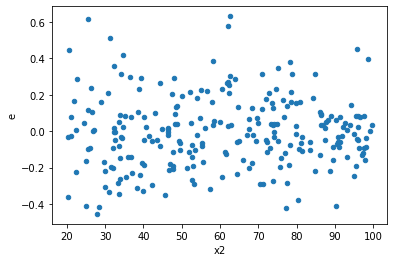

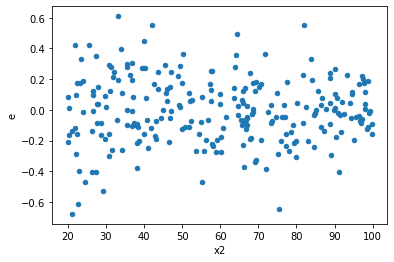

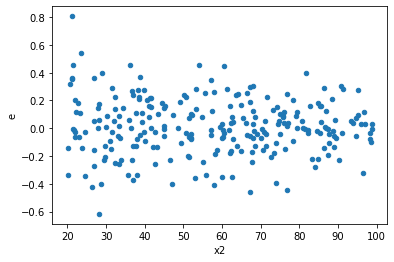

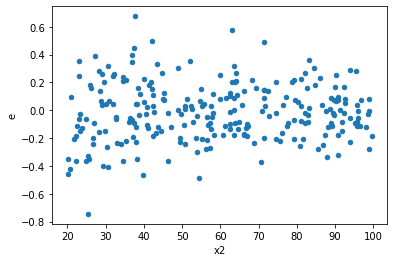

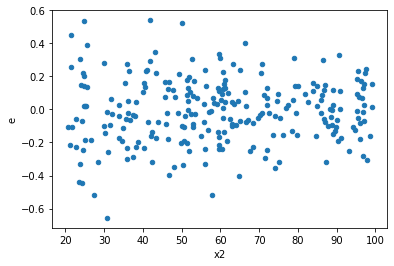

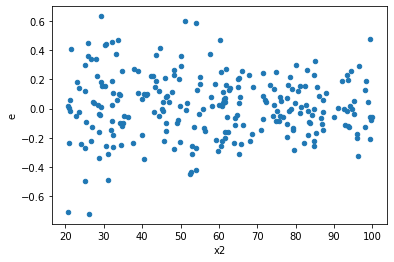

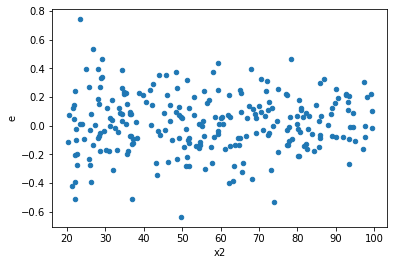

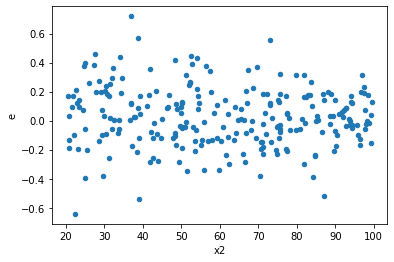

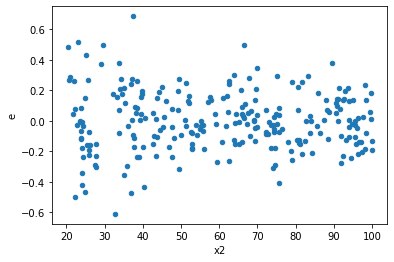

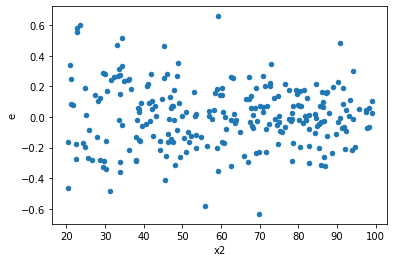

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,134.0,112.0,3.9802876098821485,5.412223219826566,0.029703638879717525,0.04832342160559434,1.626851908659276,0.008168837309817434,0.9959155813450913,0.004084418654908717,Reject001=0 : Heteroscedasticity
6.0,127.0,119.0,5.170698327172022,5.189610599067909,0.04071416005647261,0.043610173101411,1.071130364495337,0.7054838041883675,0.6472580979058162,0.35274190209418377,Reject001=1 : Homoscedasticity
10.0,132.0,114.0,3.8612031096558592,4.994508834158014,0.029251538709514083,0.04381148100138609,1.4977496205058223,0.02732237810842042,0.9863388109457898,0.01366118905421021,Reject001=1 : Homoscedasticity
11.0,127.0,119.0,5.12930540622159,7.036236088053483,0.04038823154505189,0.05912803435339062,1.4639916651818494,0.03610880875895872,0.9819455956205206,0.01805440437947936,Reject001=1 : Homoscedasticity
13.0,119.0,127.0,3.6496195465408023,6.843150546889271,0.03066907181967061,0.053883075172356465,1.7569190058695157,0.0018825091235372682,0.9990587454382314,0.0009412545617686341,Reject001=0 : Heteroscedasticity
14.0,115.0,131.0,4.230924446856126,7.3767097968483455,0.03679064736396632,0.05631076180800264,1.5305727363513264,0.018451152352017886,0.9907744238239911,0.009225576176008943,Reject001=1 : Homoscedasticity
15.0,132.0,114.0,4.492996430797389,5.820308817558415,0.03403785174846507,0.05105534050489837,1.4999577788336982,0.026770159782947944,0.986614920108526,0.013385079891473972,Reject001=1 : Homoscedasticity
16.0,127.0,119.0,4.356361879024479,5.707450135972316,0.034302062039562826,0.04796176584850686,1.398218153567252,0.06512166091647598,0.967439169541762,0.03256083045823799,Reject001=1 : Homoscedasticity
17.0,146.0,100.0,5.553973560996006,4.9270084239779965,0.03804091480134251,0.049270084239779965,1.2951866298977954,0.1670977436246177,0.9164511281876911,0.08354887181230886,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,134.0,112.0,3.9802876098821485,5.412223219826566,0.029703638879717525,0.04832342160559434,1.626851908659276,0.008168837309817434,Reject001=0 : Heteroscedasticity
1.0,139.0,107.0,7.681709200922591,3.5613264687950728,0.055264094970666124,0.033283424942010024,0.602261286639665,0.005016414680029083,Reject001=0 : Heteroscedasticity
2.0,125.0,121.0,6.484853064092259,3.537793171675335,0.05187882451273807,0.02923796009649037,0.5635817767866237,0.0015912246038506175,Reject001=0 : Heteroscedasticity
3.0,109.0,137.0,5.124957292289338,5.171352240943217,0.047017956809993926,0.03774709664922056,0.8028229895603887,0.23232229782764338,Reject001=1 : Homoscedasticity
4.0,113.0,133.0,5.026709465897697,4.012085141632948,0.044484154565466345,0.03016605369648833,0.6781303138422833,0.03402609639021411,Reject001=1 : Homoscedasticity
5.0,123.0,123.0,6.954682743503638,4.360738325769262,0.05654213612604584,0.035453157120075296,0.627021891090952,0.010123838268776351,Reject001=1 : Homoscedasticity
6.0,127.0,119.0,5.170698327172022,5.189610599067909,0.04071416005647261,0.043610173101411,1.071130364495337,0.7054838041883675,Reject001=1 : Homoscedasticity
7.0,115.0,131.0,5.880540163312992,4.318625080971373,0.051135131854895585,0.0329666036715372,0.6446957791188532,0.016423921014450876,Reject001=1 : Homoscedasticity
8.0,142.0,104.0,6.906949211952954,2.4235915234893466,0.048640487408119396,0.023303764648936024,0.47910220252122726,4.8215892060142285e-05,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      617
Reject001=0 : Heteroscedasticity    383
Name: Result_test, dtype: int64